In [4]:
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# load boxes.npy and masks.npy

In [16]:
%pwd

'/groups/4/gaa50089/acd13264yb/CK2Telescope/Segmentation'

In [15]:
%ls ./root/results/

Result2021-12-12_00:40:03_EST-0500/  Result2021-12-13_01:56:26_EST-0500/
Result2021-12-12_01:42:54_EST-0500/  Result2021-12-13_02:01:29_EST-0500/
Result2021-12-12_01:52:50_EST-0500/  Result2021-12-16_01:52:25_EST-0500/
Result2021-12-12_02:27:34_EST-0500/  Result2021-12-16_02:22:00_EST-0500/
Result2021-12-12_22:00:55_EST-0500/  Result2021-12-16_02:24:29_EST-0500/
Result2021-12-12_22:18:04_EST-0500/  Result2021-12-16_02:26:39_EST-0500/
Result2021-12-13_01:22:54_EST-0500/  Result2021-12-16_02:28:32_EST-0500/
Result2021-12-13_01:30:53_EST-0500/  Result2021-12-16_02:34:15_EST-0500/
Result2021-12-13_01:39:03_EST-0500/  Result2021-12-16_02:37:36_EST-0500/


In [6]:
boxes = np.load(sdir+"/rois/"+name[]".npy",allow_pickle=True)
masks = np.load(sdir+"/rois/3_488_STED_decon_gamma0.7_masks.npy",allow_pickle=True)

In [20]:
print("boxes.shape",boxes.shape)
print("masks.shape",masks.shape)
      
print("boxes[0]",boxes[0])

# Set save path for segmentation

In [7]:
%pwd

'/groups/4/gaa50089/acd13264yb/TelescopeCell/Segmentation'

In [ ]:
Cell04 = "../../Datasets/210901PictData/Cell04/"
if not os.path.exists(Cell01):
    os.makedirs(Cell01)

In [5]:
# Cell01 = "../../Datasets/210901PictData/Cell01/"
# Cell02 = "../../Datasets/210901PictData/Cell02/"
# Cell03 = "../../Datasets/210901PictData/Cell03/"
# Cell04 = "../../Datasets/210901PictData/Cell04/"
# if not os.path.exists(Cell01):
#     os.makedirs(Cell01)
# if not os.path.exists(Cell02):
#     os.makedirs(Cell02)
# if not os.path.exists(Cell03):
#     os.makedirs(Cell03)
# if not os.path.exists(Cell04):
#     os.makedirs(Cell04)

# %ls ../../Datasets/210901PictData/

# imgpath = "../../Datasets/210901PictData/1/"
# savepath =  "../../Datasets/210901PictData/Cell01/"

1/      2/      3/      4/      Cell01/ Cell02/ Cell03/ Cell04/


# pick each cell of the whole image

## box in 512 ==> 5120

In [7]:
# box in 512 ==> 5120
box_all=[]
for x in range(boxes.shape[0]):
    box_all.append([boxes[x][0]*10, boxes[x][1]*10, (boxes[x][2]+1)*10-1, (boxes[x][3]+1)*10-1])
box_all = np.array(box_all)
print("box_all.shape：", box_all.shape)
print("box[1] before：", boxes[1])      
print("box[1] after：", box_all[1])
print("")

box_all.shape： (37, 4)
box[1] before： [  0 248  22 358]
box[1] after： [   0 2480  229 3589]



For example：
Cut the box from origin image with shape 5120*5120
1_488_conf_gamma6.tif


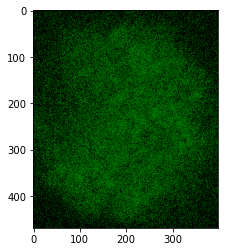

In [9]:
# ** For example **
print("For example：")
print("Cut the box from origin image with shape 5120*5120")

image_path="../../Datasets/210901PictData/1/1_488_conf_gamma6.tif"
name="1_488_conf_gamma6.tif"
print(name)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_box = img[box_all[11][0]:box_all[11][2], box_all[11][1]:box_all[11][3]]
plt.imshow(img_box)
plt.show()

## mask 512 * 512 ==>  5120 * 5120

In [10]:
# mask 512*512 ==>  5120*5120
img_mask_all = []
for i in range(masks.shape[2]):
    mask = masks[:,:,i]
    img_mask = np.zeros((5120,5120))
    for x in range(512):
        for y in range(512):
            if mask[x][y] == True:
                for m in range(10*x,10*(x+1)):
                    for n in range(10*y,10*(y+1)):
                        img_mask[m][n]=1
    img_mask_all.append(img_mask)
    
img_mask_all = np.array(img_mask_all)
print("img_mask_all.shape：", img_mask_all.shape)
print("")

img_mask_all.shape： (37, 5120, 5120)



For example：


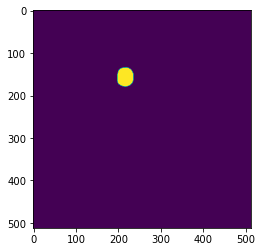

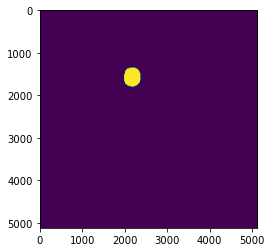

In [11]:
# For example
print("For example：")
# mask 512*512
mask=masks[:,:,11]
img_mask = np.zeros((512,512))
for x in range(512):
    for y in range(512):
        if mask[x][y] == True:
            img_mask[x][y]=1
            
# img_mask=cv2.merge([img_mask,img_mask,img_mask])
plt.imshow(img_mask)
plt.show()     

# mask 5120*5120
plt.imshow(img_mask_all[11])
plt.show()

pic.shape (439, 509, 3)


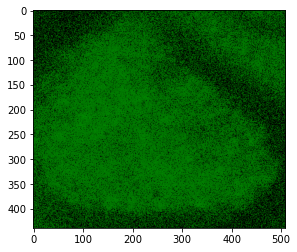

mask.shape (439, 509, 3)


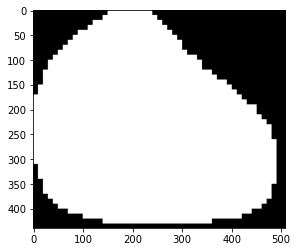

pic_mask.shape (439, 509, 3)


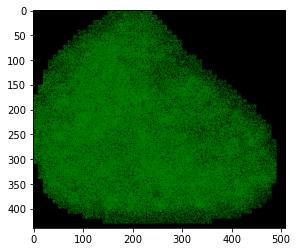

In [39]:
img = cv2.imread("../../Datasets/210901PictData/1/1_488_STED_gamma6.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
i=10
pic = img[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
print("pic.shape",pic.shape)
plt.imshow(pic)
plt.show()

mask = img_mask_all[i,:,:]
mask = mask[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
mask = cv2.merge([mask,mask,mask])
print("mask.shape",mask.shape)
plt.imshow(mask)
plt.show()


pic_mask=np.multiply(pic,mask)
pic_mask=pic_mask.astype(np.uint8)
print("pic_mask.shape",pic_mask.shape)
plt.imshow(pic_mask)
plt.show()

## remove the pixel that is not in mask

In [49]:
%rm -r ../../Datasets/NDAcquisition/CellNDA_01x40/

savepath =  "../../Datasets/NDAcquisition/CellNDA_01x40/"
if not os.path.exists(savepath):
    os.makedirs(savepath)
    print("mkdir: ../../Datasets/NDAcquisition/CellNDA_01x40/")

In [50]:
# 1. 512 * 512 ==> 5120 * 5120
# 2. split each boxes
# 3. retain only pixel that mask is true

for name in os.listdir(imgpath):
    image_path = os.path.join(imgpath,name)
    savepath = Cell01+name[0:len(name)-4]+"/"
    if not os.path.exists(savepath):
        os.makedirs(savepath)
        
    img = cv2.imread(image_path)
    
    for i in range(box_all.shape[0]):
        pic = img[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
        
        mask = img_mask_all[i,:,:]
        mask=mask[box_all[i][0]:box_all[i][2], box_all[i][1]:box_all[i][3]]
        mask = cv2.merge([mask,mask,mask])
        
        pic_mask=np.multiply(pic,mask)
        pic_mask=pic_mask.astype(np.uint8)
        cv2.imwrite(savepath + name[0:len(name)-4] + "_"+str(i)+'.tif', pic_mask)
    print("Successful saved : " + name)

Successful saved : 1_555_STED_decon_gamma6.tif
Successful saved : 1_555_STED.tif
Successful saved : 1_555_conf.tif
Successful saved : 1_488_STED_decon_linear.tif
Successful saved : 1_488_STED_linear.tif
Successful saved : 1_999_conf_gamma6.tif
Successful saved : 1_488_STED_decon.tif
Successful saved : 1_555_STED_gamma6.tif
Successful saved : 1_999_STED_decon_linear.tif
Successful saved : 1_999_conf_linear.tif
Successful saved : 1_999_STED_decon_gamma6.tif
Successful saved : 1_555_STED_linear.tif
Successful saved : 1_555_STED_decon_linear.tif
Successful saved : 1_488_STED_gamma6.tif
Successful saved : 1_488_STED_decon_gamma6.tif
Successful saved : 1_999_STED.tif
Successful saved : 1_999_conf.tif
Successful saved : 1_555_conf_gamma6.tif
Successful saved : 1_999_STED_gamma6.tif
Successful saved : 1_488_conf_linear.tif
Successful saved : 1_999_STED_decon.tif
Successful saved : 1_488_conf_gamma6.tif
Successful saved : 1_488_STED.tif
Successful saved : 1_488_conf.tif
Successful saved : 1_555